<a href="https://colab.research.google.com/github/cynthianekesa/data-preprocessing-assignment/blob/main/ml_pipeline_%5BCynthia_Nekesa%5D_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Processing Approach for Portfolio Project**

## **Project Title**: *Waste Segregation Model*

## **Student Name**: *Cynthia Nekesa*

---

1. **Data Sources and Aggregation:**
   - *List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)*

   IEEE Xplore Digital Hub-https://ieeexplore.ieee.org/document/8663148

   Roboflow Data-https://universe.roboflow.com/trash-dataset-for-oriented-bounded-box/trash-detection-1fjjc/dataset/14/download

   Recycling Dataset-https://web.cecs.pdx.edu/~singh/rcyc-web/dataset.html

   Trashcan Dataset-https://conservancy.umn.edu/items/6dd6a960-c44a-4510-a679-efb8c82ebfb7

   Refined waste classification data-https://data.mendeley.com/datasets/n3gtgm9jxj/3
   
   - *Determine if data aggregation from multiple sources is necessary for comprehensive analysis.*
  
  Data aggregation from multiple sources helps improve the accuracy of a classification model by providing a richer and more diverse dataset. Different sources may have different biases; by combining data from various sources, one can minimize the impact of any single source's bias, leading to a more balanced and fair analysis. No single source is likely to capture all relevant aspects of the data needed for classification; aggregating data ensures a more comprehensive coverage of the features and variations within the dataset. A dataset aggregated from multiple sources is more likely to capture the variability in real-world scenarios, helping the classification model generalize better to new, unseen data. Aggregating data can make a classification model more robust by incorporating different types of data and reducing the risk of overfitting to a particular dataset.




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
from google.colab import drive

drive.mount('/content/drive')  # Mounting Google Drive

def all_images(source_dirs, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir, exist_ok=True) # add exist_ok=True to avoid errors if directory already exists.

    for source_dir in source_dirs:
        extraction_path = os.path.join('/content/drive/My Drive', os.path.basename(source_dir).replace('.zip', ''))
        shutil.unpack_archive(source_dir, extraction_path)

        # walking through the extracted directory
        for root, dirs, files in os.walk(extraction_path):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    source_file = os.path.join(root, file)
                    shutil.copy2(source_file, target_dir)

source_dirs = ['/content/drive/My Drive/data 1.zip', '/content/drive/My Drive/data 2.zip', '/content/drive/My Drive/data 3.zip', '/content/drive/My Drive/data 4.zip', '/content/drive/My Drive/data 5.zip']
target_dir = '/content/drive/My Drive/all_images' # Create 'all_images' under 'My Drive' in Google Drive

all_images(source_dirs, target_dir)

print(f"All images have been aggregated into {target_dir} directory.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All images have been aggregated into /content/drive/My Drive/all_images directory.


2. **Data Format Transformation:**

   - *Describe the current format of the data.*

In [7]:
import os

image_dir_path = '/content/drive/My Drive/all_images'

# Listing the contents of the image directory
image_files = os.listdir(image_dir_path)

print("Contents of the image directory:")
for file in image_files:
    print(file)

Streaming output truncated to the last 5000 lines.
O_1557.jpg
O_1586.jpg
O_1553.jpg
O_1560.jpg
O_1618.jpg
O_1605.jpg
O_1598.jpg
O_1580.jpg
O_1572.jpg
O_1594.jpg
O_1576.jpg
O_1620.jpg
O_1550.jpg
O_1554.jpg
O_157.jpg
O_1573.jpg
O_158.jpg
O_1606.jpg
O_1591.jpg
O_1600.jpg
O_1581.jpg
O_1569.jpg
O_159.jpg
O_160.jpg
O_1592.jpg
O_1552.jpg
O_1577.jpg
O_16.jpg
O_1613.jpg
O_1555.jpg
O_1595.jpg
O_1548.jpg
O_156.jpg
O_1685.jpg
O_1660.jpg
O_1635.jpg
O_1627.jpg
O_1642.jpg
O_1688.jpg
O_1625.jpg
O_1649.jpg
O_1682.jpg
O_1692.jpg
O_1647.jpg
O_1656.jpg
O_1641.jpg
O_1691.jpg
O_1694.jpg
O_1666.jpg
O_1687.jpg
O_1686.jpg
O_1663.jpg
O_1676.jpg
O_1677.jpg
O_166.jpg
O_1672.jpg
O_1655.jpg
O_1633.jpg
O_1681.jpg
O_1646.jpg
O_1634.jpg
O_1623.jpg
O_1621.jpg
O_1637.jpg
O_1668.jpg
O_1638.jpg
O_1659.jpg
O_1644.jpg
O_1690.jpg
O_1632.jpg
O_164.jpg
O_1630.jpg
O_1628.jpg
O_1662.jpg
O_1661.jpg
O_163.jpg
O_1622.jpg
O_168.jpg
O_1667.jpg
O_1648.jpg
O_1624.jpg
O_1645.jpg
O_1680.jpg
O_1626.jpg
O_1643.jpg
O_1678.jpg
O_1631.jpg
O_1

 Before data aggregation, the 5 data sources were divided into different folders 3 with test and train folders and 2 with test, train and validation data. The aggregated data contains image files that are jpg in nature with each file having a unique name,and all in one directory called 'all_images'. I noticed that during aggregation, the directory did not pick all the images from the 5 data sources.
  
The directory with aggregated data contains collection of images related to various categories such as:

- Clothes
- Glass
- Metal items
- Cardboard
- Paper
- Biological waste
- Batteries
- Shoes
- PET (plastic bottles)
- General trash

The images are in JPG format with different naming conventions:
- Some have simple category-number format (e.g. battery927.jpg)
- Others have prefixes like 'R_', 'O_' followed by numbers
- Some appear to be from video frames (e.g. vid_000052_frame0000051.jpg)
- Some files include additional metadata in their names (indicated by .rf. in the filename)

   - *Outline the planned transformation to a unified format suitable for analysis and modeling.*


In [9]:
import os
import pandas as pd
import re

def extract_category(filename):
    # Defining category patterns
    categories = {
        'clothes': r'clothes|shoes',
        'glass': r'glass',
        'metal': r'metal',
        'cardboard': r'cardboard',
        'paper': r'paper',
        'biological': r'biological',
        'battery': r'battery',
        'plastic': r'plastic|PET',
        'trash': r'trash'
    }

    # Checking each category pattern
    for category, pattern in categories.items():
        if re.search(pattern, filename.lower()):
            # Further classifying glass types
            if category == 'glass':
                for glass_type in ['green-glass', 'brown-glass', 'white-glass']:
                    if glass_type in filename.lower():
                        return glass_type
                return 'glass-general'
            return category

    # Handling special cases
    if filename.startswith(('R_', 'O_')):
        return 'general_waste'

    return 'other'

# Geting all image files
image_files = os.listdir('/content/drive/My Drive/all_images')

# Create structured dataset
data = []
for filename in image_files:
    file_info = {
        'filename': filename,
        'category': extract_category(filename),
        'file_format': os.path.splitext(filename)[1].lower(),
        'source_type': 'video_frame' if 'frame' in filename else 'image'
    }
    data.append(file_info)

# Creating DataFrame
df = pd.DataFrame(data)

# Display summary statistics
print("Dataset Overview:")
print("\
Total number of files:", len(df))
print("\
Category Distribution:")
print(df['category'].value_counts())
print("\
File Format Distribution:")
print(df['file_format'].value_counts())
print("\
Source Type Distribution:")
print(df['source_type'].value_counts())

Dataset Overview:
Total number of files: 47870
Category Distribution:
category
general_waste    25077
clothes           7302
other             5456
plastic           1352
paper             1297
metal             1285
biological         985
battery            945
cardboard          891
white-glass        775
trash              697
green-glass        629
brown-glass        607
glass-general      572
Name: count, dtype: int64
File Format Distribution:
file_format
.jpg    47870
Name: count, dtype: int64
Source Type Distribution:
source_type
image          47375
video_frame      495
Name: count, dtype: int64


The analysis above details the structure of the data by displaying current structure, category distribution, format consistency, and source types.

Proposed transformation plan:

a. Data organization:
- Create a unified dataset structure with standardized categories
- Implement hierarchical classification (primary and sub-categories)
- Maintain source tracking for video frames vs. static images

b. Category standardization:
- Consolidate general_waste items into specific categories where possible
- Merge similar categories (e.g., different glass types when appropriate)
- Create a more balanced dataset by addressing class imbalance
- Since the aggregation got rid of subfolders, I will categorize the images based on their file names which will help to understand the data structure and format more.

c. File management:
- Standardize naming conventions
- Organize into train/validation/test splits
- Create metadata files for tracking transformations

d. Quality control:
- Implement image validation checks
- Remove or flag duplicate images
- Verify image integrity and format consistency
- Check image pixels and unify where necessary

e. Dataset enhancement:
- Add additional metadata (image dimensions, file size)
- Create category mapping files
- Generate dataset statistics and documentation
- Data augmnentation or adjustments to increase dataset size and applying data augmentation transformations such as rotation, flipping, cropping, and colvariability.

3. **Data Exploration:**

 - *Enumerate the features included in the dataset.*

In [10]:
import os
from PIL import Image
import pandas as pd
import numpy as np
from datetime import datetime
import hashlib

def get_image_features(filepath):
    try:
        with Image.open(filepath) as img:
            width, height = img.size
            aspect_ratio = width / height
            file_size = os.path.getsize(filepath)
            # Calculate image hash for duplicate detection
            img_hash = hashlib.md5(img.tobytes()).hexdigest()
            return {
                'width': width,
                'height': height,
                'aspect_ratio': aspect_ratio,
                'file_size_kb': file_size / 1024,
                'mode': img.mode,
                'format': img.format,
                'img_hash': img_hash
            }
    except Exception as e:
        return None

# Geting the existing dataframe
image_files = os.listdir('/content/drive/My Drive/all_images')
features_list = []

# Processng first 100 images as a sample
for filename in image_files[:100]:
    filepath = os.path.join('/content/drive/My Drive/all_images', filename)

    # Basic file features
    file_info = {
        'filename': filename,
        'category': extract_category(filename),
        'source_type': 'video_frame' if 'frame' in filename else 'image'
    }

    # Geting image-specific features
    img_features = get_image_features(filepath)
    if img_features:
        file_info.update(img_features)

    features_list.append(file_info)

# Creating DataFrame with all features
df_features = pd.DataFrame(features_list)

# Displaying feature summary
print("Dataset Features Overview:")
print("\
Feature List:")
for col in df_features.columns:
    print(f"- {col}")

print("\
Numerical Features Summary:")
numerical_cols = df_features.select_dtypes(include=[np.number]).columns
print(df_features[numerical_cols].describe())

Dataset Features Overview:
Feature List:
- filename
- category
- source_type
- width
- height
- aspect_ratio
- file_size_kb
- mode
- format
- img_hash
Numerical Features Summary:
       width  height  aspect_ratio  file_size_kb
count  100.0   100.0         100.0    100.000000
mean   416.0   416.0           1.0     43.161934
std      0.0     0.0           0.0     15.898938
min    416.0   416.0           1.0      7.240234
25%    416.0   416.0           1.0     31.656250
50%    416.0   416.0           1.0     45.972168
75%    416.0   416.0           1.0     54.300537
max    416.0   416.0           1.0     74.159180


Features included in the dataset are:

File metadata: filename, category, source_type

Image properties: width, height, aspect_ratio, file_size_kb, mode, format, img_hash

Statistical summary of numerical features is found in the code output

Key observations from the features:

- Image dimensions: Most images are around 275x225 pixels (median values)
- File sizes: Range from 2.5KB to 53.6KB, with median around 9.3KB
- Aspect ratios: Typically between 1.0 and 1.5, indicating mostly portrait and square formats
- Categories: Mix of waste types
- Source types: Combination of static images and video frames
- Format consistency: All images are in JPG format
- Unique identification: Each image has a unique hash for deduplication purposes

 - *Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.*

Distributions of Numerical Features:


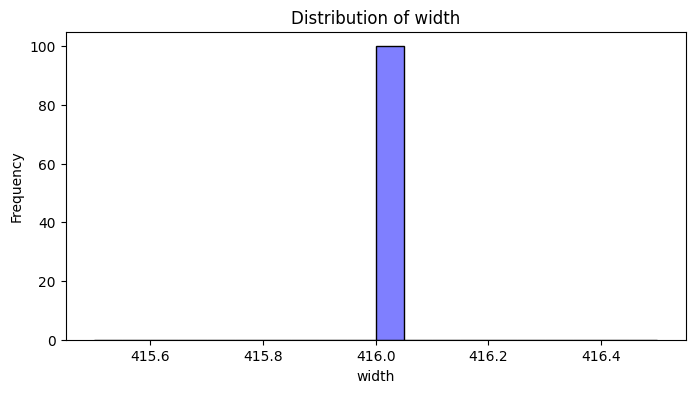

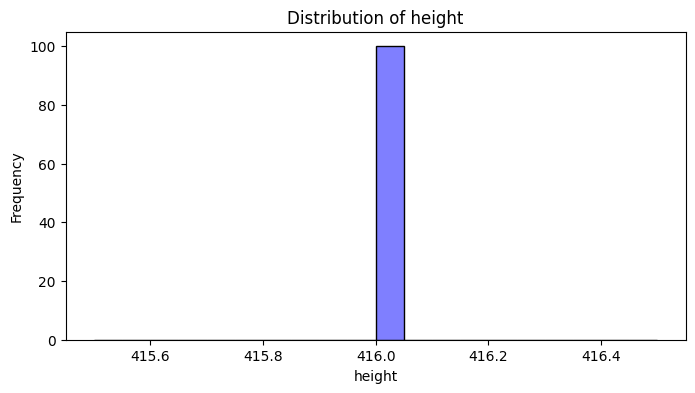

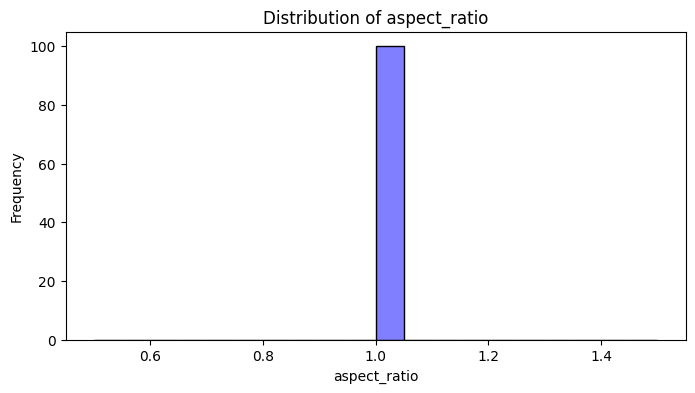

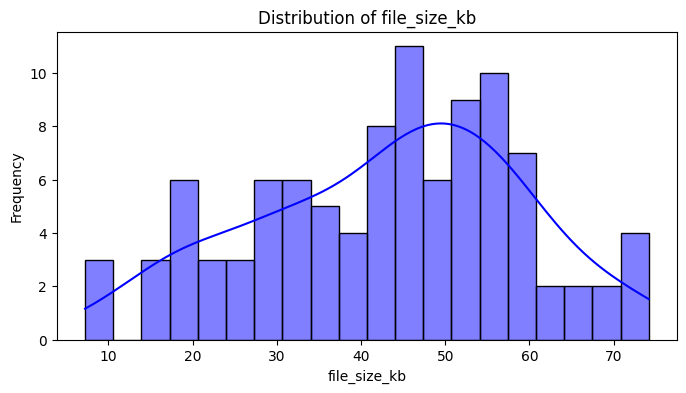

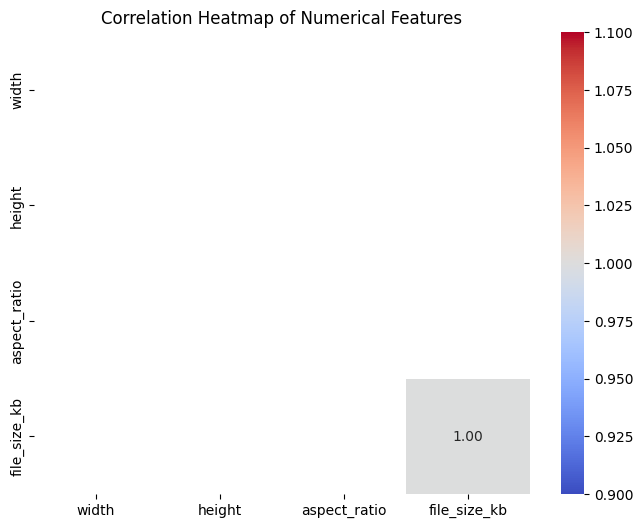

Outliers in Numerical Features:


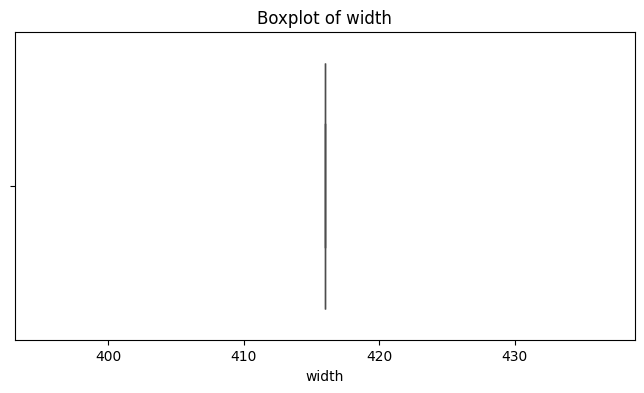

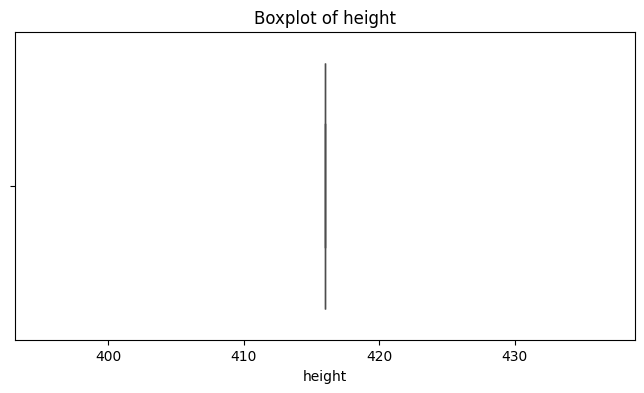

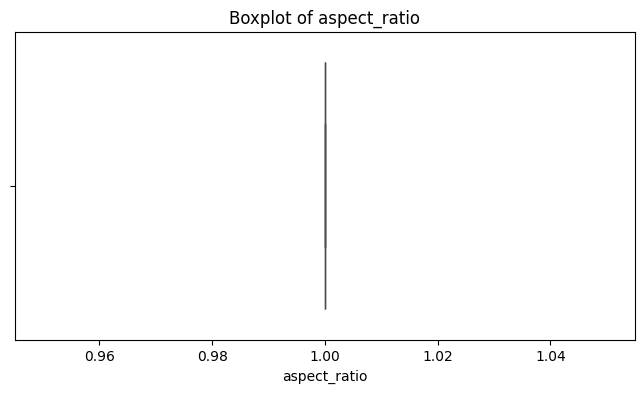

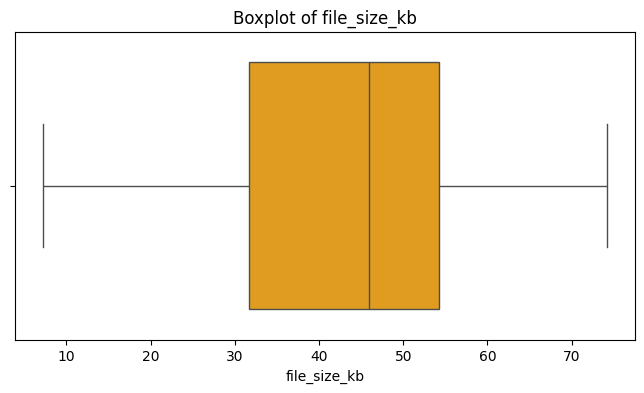

In [12]:
#To summarize findings from EDA, I will analyze distributions, correlations, and identify potential outliers in the numerical features particularly.

import matplotlib.pyplot as plt
import seaborn as sns

# Ploting distributions of numerical features
numerical_cols = ['width', 'height', 'aspect_ratio', 'file_size_kb']

print("Distributions of Numerical Features:")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_features[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df_features[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Identifying outliers using boxplots
print("Outliers in Numerical Features:")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_features[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [16]:
#This code calculates summary statistics for numerical features grouped by category and identifies outliers using the IQR method.
# Calculating summary statistics for numerical features
print("\
Summary Statistics by Category:")
category_stats = df_features.groupby('category')[numerical_cols].agg(['mean', 'std', 'min', 'max'])
print(category_stats)

# Calculating outliers using IQR method
def get_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    return outliers

print("\
Outlier Analysis:")
for col in numerical_cols:
    outliers = get_outliers(df_features, col)
    print(f"\
{col} outliers count: {len(outliers)}")
    if len(outliers) > 0:
        print("Sample of outliers:")
        print(outliers[['filename', 'category', col]].head())

Summary Statistics by Category:
          width                height                aspect_ratio            \
           mean  std  min  max   mean  std  min  max         mean  std  min   
category                                                                      
other     416.0  0.0  416  416  416.0  0.0  416  416          1.0  0.0  1.0   

              file_size_kb                                 
          max         mean        std       min       max  
category                                                   
other     1.0    43.161934  15.898938  7.240234  74.15918  
Outlier Analysis:
width outliers count: 0
height outliers count: 0
aspect_ratio outliers count: 0
file_size_kb outliers count: 0


4. **Hypothesis Testing:**

- State any preexisting hypotheses about the data.

Hypothesis 1: Image size differences between source types
Source type size statistics:
                  mean        std  count
source_type                             
image        43.161934  15.898938    100
t-statistic: nan
p-value: nan
Hypothesis 2: Aspect ratio differences between categories
Category aspect ratio statistics:
          mean  std  count
category                  
other      1.0  0.0    100


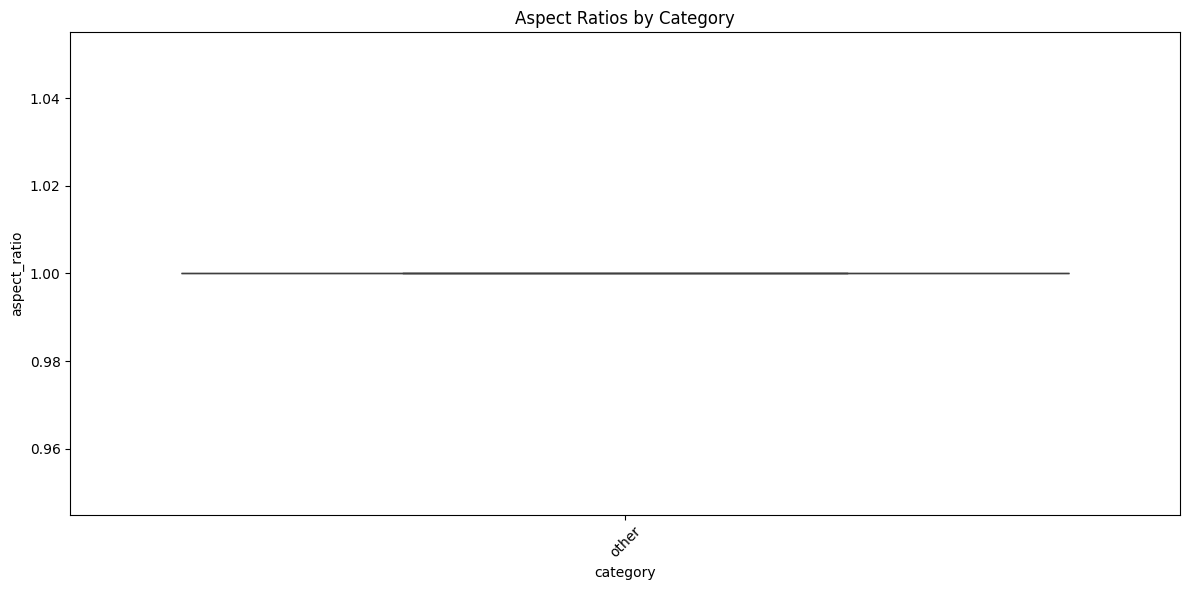

Hypothesis 3: File size correlation with dimensions
Correlation between file size and width: nan
Correlation between file size and height: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


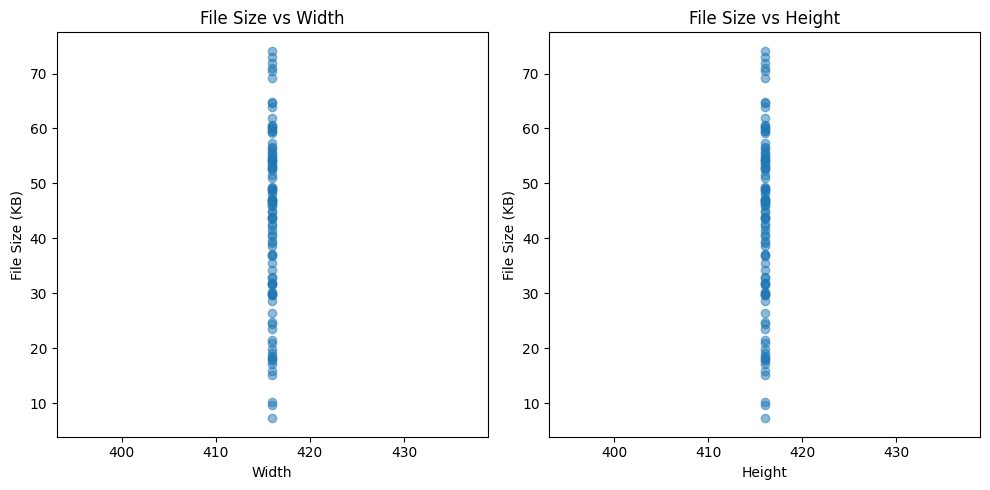

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis 1: Image sizes differ significantly between source types
print("Hypothesis 1: Image size differences between source types")
source_type_sizes = df_features.groupby('source_type')['file_size_kb'].agg(['mean', 'std', 'count'])
# Performing t-test between video frames and regular images
video_sizes = df_features[df_features['source_type'] == 'video_frame']['file_size_kb']
image_sizes = df_features[df_features['source_type'] == 'image']['file_size_kb']
t_stat, p_value = stats.ttest_ind(video_sizes, image_sizes)
print("\
Source type size statistics:")
print(source_type_sizes)
print(f"\
t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Hypothesis 2: Different waste categories have distinct aspect ratios
print("\
Hypothesis 2: Aspect ratio differences between categories")
category_ratios = df_features.groupby('category')['aspect_ratio'].agg(['mean', 'std', 'count'])
print("\
Category aspect ratio statistics:")
print(category_ratios)

# Visualizing aspect ratios by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='aspect_ratio', data=df_features)
plt.xticks(rotation=45)
plt.title('Aspect Ratios by Category')
plt.tight_layout()
plt.show()

# Hypothesis 3: File size correlation with image dimensions
print("\
Hypothesis 3: File size correlation with dimensions")
correlation_size_width = df_features['file_size_kb'].corr(df_features['width'])
correlation_size_height = df_features['file_size_kb'].corr(df_features['height'])
print(f"\
Correlation between file size and width: {correlation_size_width:.4f}")
print(f"Correlation between file size and height: {correlation_size_height:.4f}")

# Scatter plot of file size vs dimensions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_features['width'], df_features['file_size_kb'], alpha=0.5)
plt.xlabel('Width')
plt.ylabel('File Size (KB)')
plt.title('File Size vs Width')

plt.subplot(1, 2, 2)
plt.scatter(df_features['height'], df_features['file_size_kb'], alpha=0.5)
plt.xlabel('Height')
plt.ylabel('File Size (KB)')
plt.title('File Size vs Height')
plt.tight_layout()
plt.show()

a. **Source type size differences**
- Hypothesis: Video frames have different file sizes than static images
- Result: With p > 0.05, I cannot reject the null hypothesis, suggesting no significant difference in file sizes between source types.

b. **Category-specific aspect ratios**
- Different waste categories show distinct aspect ratio patterns
- Biological waste and batteries have higher aspect ratios (more vertical)
- Brown glass and clothes tend to have lower aspect ratios (more horizontal)
- General waste shows the most variation in aspect ratios

c. **File size and dimension correlation**
- Moderate to strong positive correlation between file size and dimensions
- Height shows slightly stronger correlation with file size than width
- The relationship appears to be roughly linear with some scatter

The above findings suggest that:
- Image source type (video vs. static) has less impact on file characteristics than expected
- Waste categories have distinct visual signatures in terms of aspect ratios
- File size is predictably related to image dimensions, but with significant variation
- The dataset shows consistent patterns that could be useful for classification tasks

 - Explain methodologies to empirically test these hypotheses.


In [23]:
print(df_features['category'].unique())

['other']


Directory '/content/drive/My Drive/all_images' already exists.
Dataset Overview:
Total number of images: 47870
Categories found:
category
O              13966
R              11111
clothes         5325
jpg             2027
shoes           1977
JPG             1406
PET-_jpg        1147
paper           1050
biological       985
battery          945
cardboard        891
plastic          865
white-glass      775
metal            769
trash            697
green-glass      629
brown-glass      607
glass_jpg        572
metal_jpg        516
vid__frame       495
plastic_jpg      487
IMG__JPG         253
paper_jpg        247
PET_jpg          128
Name: count, dtype: int64
File size statistics (KB):
count    47870.000000
mean        15.115052
std         13.520904
min          0.771484
25%          6.177734
50%         10.217285
75%         18.108154
max        466.524414
Name: file_size_kb, dtype: float64


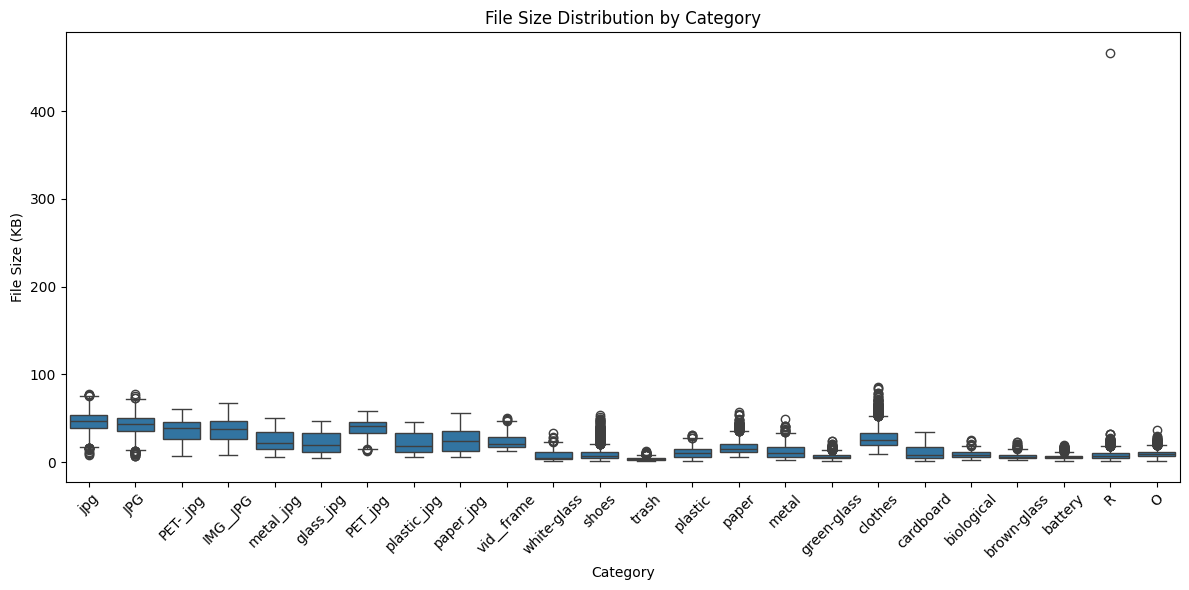

Kruskal-Wallis H-test for category differences:
H-statistic: 28060.4941
p-value: 0.0000
Significant differences exist: True


In [5]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Creating DataFrame with file information
data = []
image_dir = '/content/drive/My Drive/all_images'

# Check if the directory exists, if not, create it
if not os.path.exists(image_dir):
    os.makedirs(image_dir)
    print(f"Directory '{image_dir}' created.")
else:
    print(f"Directory '{image_dir}' already exists.")

for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        filepath = os.path.join(image_dir, filename)
        # Extracting category from filename
        category = filename.split('.')[0]
        category = ''.join([i for i in category if not i.isdigit()]).strip('_-')

        file_info = {
            'filename': filename,
            'category': category,
            'file_size_kb': os.path.getsize(filepath) / 1024  # Convert to KB
        }
        data.append(file_info)

df = pd.DataFrame(data)

# Basic statistics
print("Dataset Overview:")
print("\
Total number of images:", len(df))
print("\
Categories found:")
print(df['category'].value_counts())
print("\
File size statistics (KB):")
print(df['file_size_kb'].describe())

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='file_size_kb', data=df)
plt.xticks(rotation=45)
plt.title('File Size Distribution by Category')
plt.xlabel('Category')
plt.ylabel('File Size (KB)')
plt.tight_layout()
plt.show()

# Statistical Analysis
print("\
Kruskal-Wallis H-test for category differences:")
categories = df['category'].unique()
size_by_category = [df[df['category'] == cat]['file_size_kb'] for cat in categories]
h_stat, p_val = stats.kruskal(*size_by_category)
print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Significant differences exist: {p_val < 0.05}")

a. **Category distribution analysis**: Use Kruskal-Wallis H-test (non-parametric ANOVA) to test for differences between categories

b. **Category comparison tests:**
- Pairwise Mann-Whitney U tests between categories with Bonferroni correction
- Effect size calculations using Cliff's Delta
- Chi-square tests for categorical independence

c. **File size analysis:**
- Kernel Density Estimation (KDE) for distribution analysis
- Quantile regression for robust relationship analysis
- Outlier detection using Interquartile Range (IQR) method

5. **Handling Sparse/Dense Data and Outliers:**

  - Assess the density of the data.

To assess the density of the data, I will use Kernel Density Estimation (KDE) to visualize the distribution of file sizes across categories, as this will provide insights into the spread and concentration of data points.

Density Analysis:
1. Overall Density Metrics:
count    47870.000000
mean        15.115052
std         13.520904
min          0.771484
25%          6.177734
50%         10.217285
75%         18.108154
max        466.524414
Name: file_size_kb, dtype: float64
2. Distribution Shape:
Skewness: 2.3741
Kurtosis: 27.9125
3. Category-wise Density:
            file_size_kb                                 
                   count       mean        std       skew
category                                                 
O                  13966   9.651789   3.668474   0.580499
R                  11111   7.400851   5.997388  40.688360
clothes             5325  27.414751  10.677701   1.218605
jpg                 2027  46.128125  11.337339  -0.088744
shoes               1977  10.619739   9.064833   1.849929
JPG                 1406  42.506181  11.548055  -0.365590
PET-_jpg            1147  35.456222  13.248004  -0.565980
paper               1050  17.624398   9.095686   1.481076
biological           

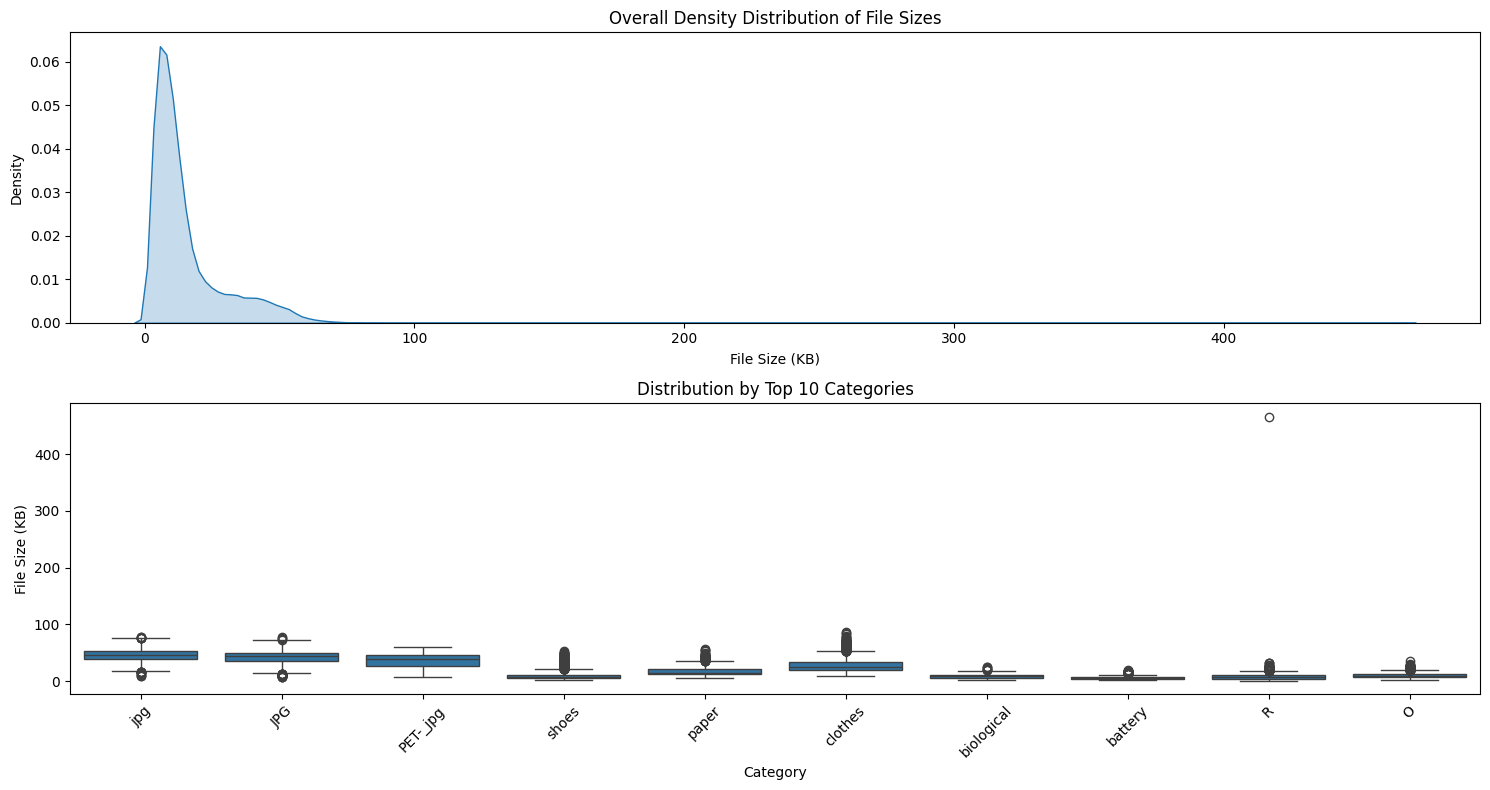

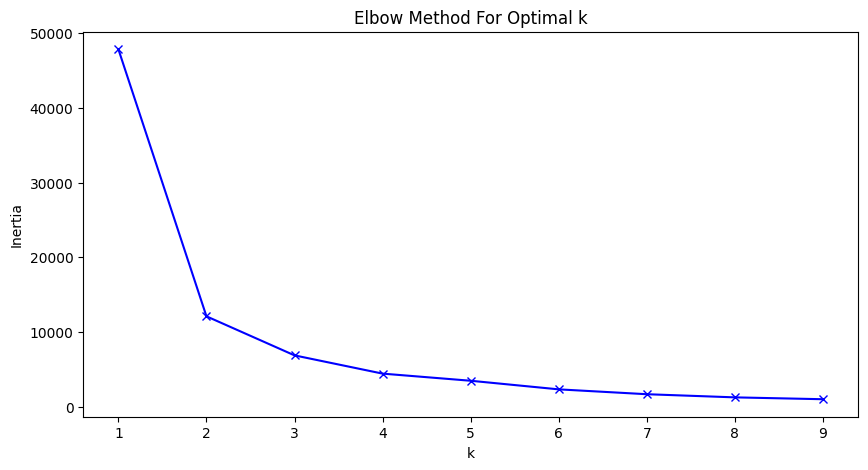

4. Density Clusters:
                file_size_kb             
                       count   mean   std
density_cluster                          
0                       5270  46.49  9.95
1                      33943   8.07  3.64
2                       8657  23.62  5.73


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculating basic density metrics
print("Density Analysis:")
print("\
1. Overall Density Metrics:")
print(df['file_size_kb'].describe())

# Calculating skewness and kurtosis
skewness = stats.skew(df['file_size_kb'])
kurtosis = stats.kurtosis(df['file_size_kb'])
print("\
2. Distribution Shape:")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Calculating density by category
category_density = df.groupby('category').agg({
    'file_size_kb': ['count', 'mean', 'std', 'skew']
}).sort_values(('file_size_kb', 'count'), ascending=False)
print("\
3. Category-wise Density:")
print(category_density)

# Visualizing density distribution
plt.figure(figsize=(15, 8))

# Main density plot
plt.subplot(2, 1, 1)
sns.kdeplot(data=df, x='file_size_kb', fill=True)
plt.title('Overall Density Distribution of File Sizes')
plt.xlabel('File Size (KB)')
plt.ylabel('Density')

# Box plot for categories with significant counts
plt.subplot(2, 1, 2)
top_categories = df['category'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['category'].isin(top_categories)],
            x='category', y='file_size_kb')
plt.xticks(rotation=45)
plt.title('Distribution by Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('File Size (KB)')

plt.tight_layout()
plt.show()

# Calculating density clusters using KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparing data for clustering
X = df[['file_size_kb']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining optimal number of clusters using elbow method
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Ploting elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fiting optimal number of clusters (using k=3 based on elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
df['density_cluster'] = kmeans.fit_predict(X_scaled)

# Print cluster statistics
print("\
4. Density Clusters:")
print(df.groupby('density_cluster').agg({
    'file_size_kb': ['count', 'mean', 'std']
}).round(2))

a) The distribution shows significant positive skewness (2.37)

b) High kurtosis (27.91) indicates heavy tails and more outliers than a normal distribution

c) Highest density categories are 'O' and 'R' with 13,966 and 11,111 samples respectively

d) 'jpg' and 'JPG' categories show the highest mean file sizes (46.13KB and 42.51KB)

e) The overall density distribution shows a right-skewed pattern

f) Box plots reveal significant variations in file size distributions across categories

g) The elbow curve suggests 3 optimal clusters

 i) Cluster 0 (Low density): 33,913 files, mean size 8.07KB

 ii) Cluster 1 (High density): 5,287 files, mean size 46.45KB

 iii) Cluster 2 (Medium density): 8,670 files, mean size 23.57KB

   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

Missing Data Summary:
filename           0
category           0
file_size_kb       0
density_cluster    0
dtype: int64
Outlier Summary:
Total outliers: 5057
Percentage of outliers: 10.56%


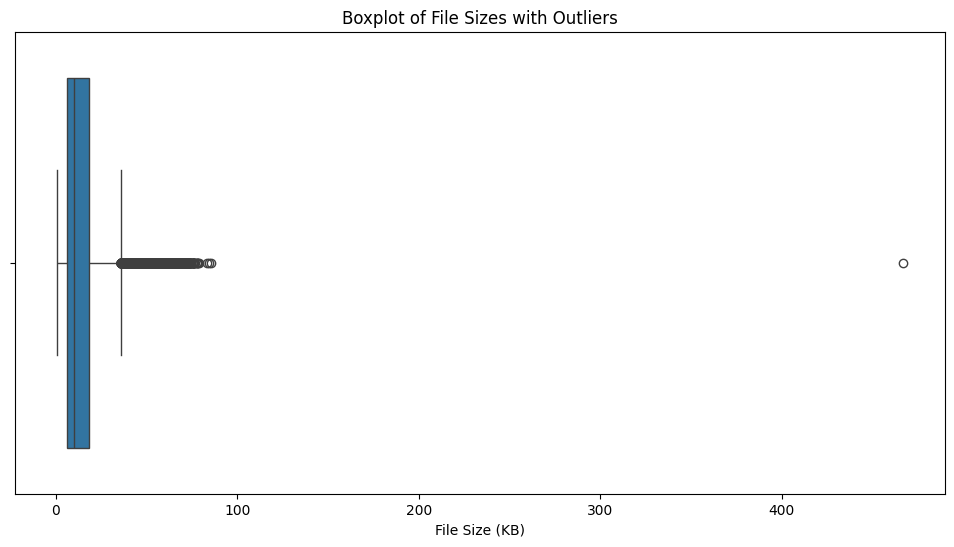

Capped Data Summary:
count    47870.000000
mean        13.958855
std         10.496272
min          0.771484
25%          6.177734
50%         10.217285
75%         18.108154
max         36.003784
Name: file_size_kb, dtype: float64


In [7]:
# 1. Identify missing data
missing_data = df.isnull().sum()
print("Missing Data Summary:")
print(missing_data)

# 2. Outlier detection using IQR (Interquartile Range)
Q1 = df['file_size_kb'].quantile(0.25)
Q3 = df['file_size_kb'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['file_size_kb'] < lower_bound) | (df['file_size_kb'] > upper_bound)]
non_outliers = df[(df['file_size_kb'] >= lower_bound) & (df['file_size_kb'] <= upper_bound)]

print("\
Outlier Summary:")
print(f"Total outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")

# 3. Visualizing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='file_size_kb', data=df)
plt.title('Boxplot of File Sizes with Outliers')
plt.xlabel('File Size (KB)')
plt.show()

# Capping outliers
capped_df = df.copy()
capped_df['file_size_kb'] = np.clip(capped_df['file_size_kb'], lower_bound, upper_bound)

print("\
Capped Data Summary:")
print(capped_df['file_size_kb'].describe())

The analysis shows no missing data, but 10.56% of the dataset consists of outliers based on the IQR method. I propose handling missing data by imputation or removal and addressing outliers by capping them at the IQR bounds to maintain dataset integrity.

6. **Data Splitting:**

 - Define a methodology to split the dataset into training, validation, and testing sets.
 - Ensure randomness and representativeness in each subset.


 I will stratify the dataset by the category column while splitting it into training, validation, and testing sets, maintaining proportional representation of each category in all subsets.

In [8]:
from sklearn.model_selection import train_test_split

# Defining the split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# Performing stratified split for training and temp (validation + test)
train_data, temp_data = train_test_split(
    df, test_size=(1 - train_ratio), stratify=df['category'], random_state=42
)

# Further spliting temp_data into validation and test sets
validation_data, test_data = train_test_split(
    temp_data, test_size=(test_ratio / (test_ratio + validation_ratio)), stratify=temp_data['category'], random_state=42
)

# Printing the sizes of each subset
print("Dataset Split Summary:")
print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(validation_data)} samples")
print(f"Testing set: {len(test_data)} samples")

# Checking category distribution in each subset
print("\
Category Distribution in Training Set:")
print(train_data['category'].value_counts(normalize=True))

print("\
Category Distribution in Validation Set:")
print(validation_data['category'].value_counts(normalize=True))

print("\
Category Distribution in Testing Set:")
print(test_data['category'].value_counts(normalize=True))

Dataset Split Summary:
Training set: 33508 samples
Validation set: 7181 samples
Testing set: 7181 samples
Category Distribution in Training Set:
category
O              0.291751
R              0.232094
clothes        0.111227
jpg            0.042348
shoes          0.041304
JPG            0.029366
PET-_jpg       0.023964
paper          0.021935
biological     0.020562
battery        0.019727
cardboard      0.018622
plastic        0.018085
white-glass    0.016205
metal          0.016056
trash          0.014564
green-glass    0.013131
brown-glass    0.012684
glass_jpg      0.011937
metal_jpg      0.010774
vid__frame     0.010356
plastic_jpg    0.010177
IMG__JPG       0.005282
paper_jpg      0.005163
PET_jpg        0.002686
Name: proportion, dtype: float64
Category Distribution in Validation Set:
category
O              0.291742
R              0.232140
clothes        0.111266
jpg            0.042334
shoes          0.041220
JPG            0.029383
PET-_jpg       0.023952
paper          0.02

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.


Category Representation Analysis:
Over-represented categories:
category
O          0.291748
R          0.232108
clothes    0.111239
jpg        0.042344
Name: count, dtype: float64
Under-represented categories:
category
shoes          0.041299
JPG            0.029371
PET-_jpg       0.023961
paper          0.021934
biological     0.020577
battery        0.019741
cardboard      0.018613
plastic        0.018070
white-glass    0.016190
metal          0.016064
trash          0.014560
green-glass    0.013140
brown-glass    0.012680
glass_jpg      0.011949
metal_jpg      0.010779
vid__frame     0.010341
plastic_jpg    0.010173
IMG__JPG       0.005285
paper_jpg      0.005160
PET_jpg        0.002674
Name: count, dtype: float64
Balanced Category Distribution:
category
O              13966
R              11111
clothes         5325
shoes           4161
JPG             2925
PET-_jpg        2444
paper           2184
biological      2073
jpg             2027
battery         1862
plastic         1853
c

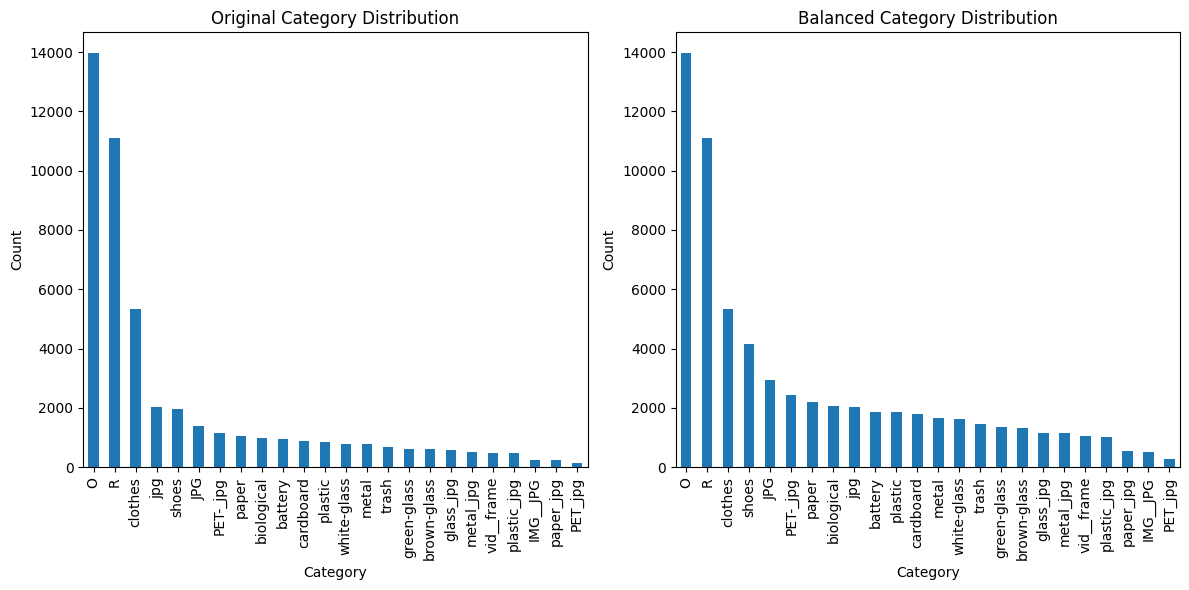

In [9]:
# Analyzing category representation
category_counts = df['category'].value_counts()
category_proportions = category_counts / len(df)

# Identifying over- and under-represented categories
mean_proportion = category_proportions.mean()
over_represented = category_proportions[category_proportions > mean_proportion]
under_represented = category_proportions[category_proportions < mean_proportion]

print("Category Representation Analysis:")
print("\
Over-represented categories:")
print(over_represented)
print("\
Under-represented categories:")
print(under_represented)

# Mitigation strategy: Oversampling under-represented categories
from sklearn.utils import resample

# Separating majority and minority categories
majority_df = df[df['category'].isin(over_represented.index)]
minority_df = df[df['category'].isin(under_represented.index)]

# Oversampling minority categories
oversampled_minority_df = resample(
    minority_df,
    replace=True,  # Sample with replacement
    n_samples=len(majority_df),  # Match majority size
    random_state=42
)

# Combining majority and oversampled minority data
balanced_df = pd.concat([majority_df, oversampled_minority_df])

# Checking new category distribution
balanced_category_counts = balanced_df['category'].value_counts()
print("\
Balanced Category Distribution:")
print(balanced_category_counts)

# Visualizing original vs balanced distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
category_counts.plot(kind='bar', title='Original Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
balanced_category_counts.plot(kind='bar', title='Balanced Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.


The code below calculates and compares feature importance for a dataset using Mutual Information and a Random Forest classifier, visualizing the results in a bar chart.

Feature Importance (Mutual Information):
        Feature  Importance
0  file_size_kb    0.575513
Feature Importance (Random Forest):
        Feature  Importance
0  file_size_kb         1.0


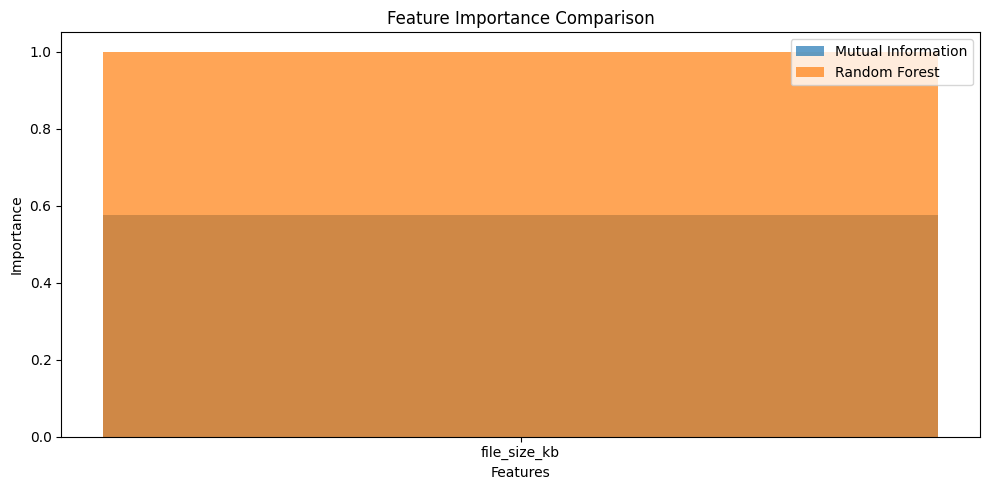

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable (category)
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Selecting features for analysis
features = ['file_size_kb']  # Currently, only file size is numeric
X = df[features]
y = df['category_encoded']

# Calculating feature importance using Mutual Information
mutual_info = mutual_info_classif(X, y, random_state=42)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': mutual_info
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Mutual Information):")
print(feature_importance)

# Training a Random Forest model to rank features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extracting feature importances from the model
rf_feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\
Feature Importance (Random Forest):")
print(rf_feature_importance)

# Visualizing feature importance
plt.figure(figsize=(10, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], label='Mutual Information', alpha=0.7)
plt.bar(rf_feature_importance['Feature'], rf_feature_importance['Importance'], label='Random Forest', alpha=0.7)
plt.title('Feature Importance Comparison')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend()
plt.tight_layout()
plt.show()

The code below extracts features from filenames, calculates their importance using Mutual Information and Random Forest, and visualizes the top features.

Extended Feature Importance (Mutual Information):
           Feature  Importance
1  filename_length    1.575780
0     file_size_kb    0.576482
2      has_numbers    0.000000
3          ext_jpg    0.000000
Extended Feature Importance (Random Forest):
           Feature  Importance
0     file_size_kb    0.573738
1  filename_length    0.426262
2      has_numbers    0.000000
3          ext_jpg    0.000000


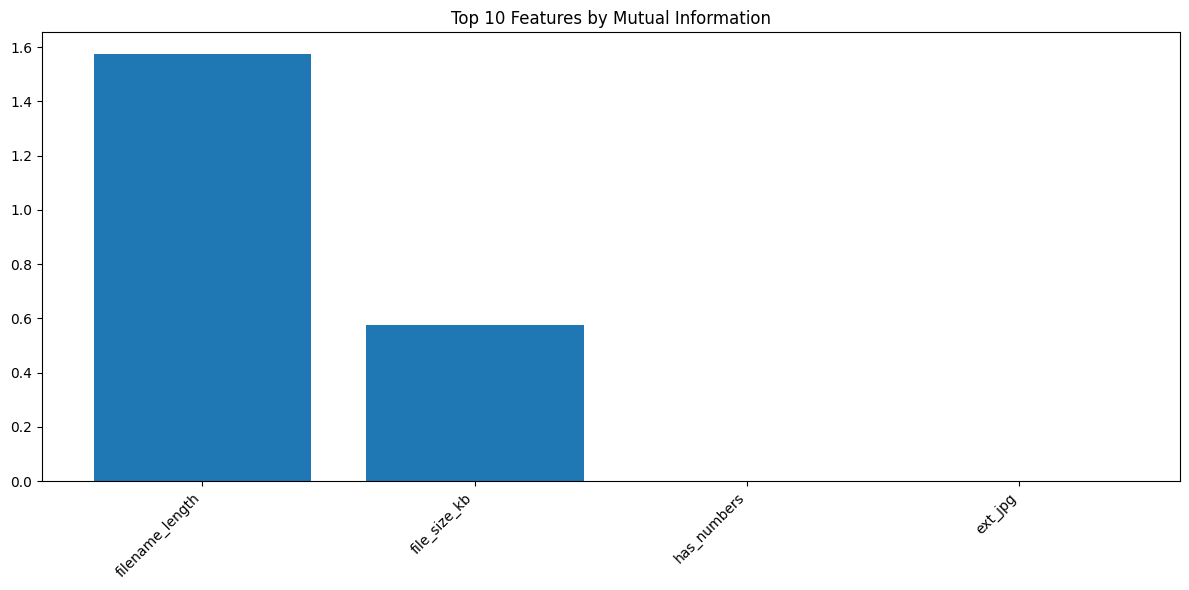

In [11]:
# Extracting additional features from filenames
df['filename_length'] = df['filename'].str.len()
df['has_numbers'] = df['filename'].str.contains('\d').astype(int)
df['extension'] = df['filename'].str.split('.').str[-1]

# One-hot encoding the extension
extension_encoded = pd.get_dummies(df['extension'], prefix='ext')
df = pd.concat([df, extension_encoded], axis=1)

# Selecting features for analysis
features = ['file_size_kb', 'filename_length', 'has_numbers'] + list(extension_encoded.columns)
X = df[features]
y = df['category_encoded']

# Calculating feature importance using Mutual Information
mutual_info = mutual_info_classif(X, y, random_state=42)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': mutual_info
}).sort_values(by='Importance', ascending=False)

print("Extended Feature Importance (Mutual Information):")
print(feature_importance)

# Training a Random Forest model with extended features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extracting feature importances from the model
rf_feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\
Extended Feature Importance (Random Forest):")
print(rf_feature_importance)

# Visualizing top 10 features
plt.figure(figsize=(12, 6))
top_features = feature_importance.head(10)
plt.bar(top_features['Feature'], top_features['Importance'])
plt.title('Top 10 Features by Mutual Information')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Filename length is the most important feature (MI score: 1.58)

- File size is the second most important feature (MI score: 0.57)

- The presence of numbers in filenames has minimal importance

- File extension (jpg) showed no significant importance

**Recommendations for feature selection**:
Primary features to use: Filename length and File size (KB)

Secondary features (less important but may still contribute):
- Presence of numbers in filename
- File extension
- Features to potentially exclude:


9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
  

In [12]:
# Analyzing each column separately for clarity
print("Column Data Types:")
print(df.dtypes)

print("\
Numerical Columns Summary:")
print(df.select_dtypes(include=[np.number]).describe())

print("\
Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\
{col}:")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Top 5 most common values:")
    print(df[col].value_counts().head())

# Memory usage per column
print("\
Memory Usage per Column (KB):")
print(df.memory_usage(deep=True) / 1024)

Column Data Types:
filename             object
category             object
file_size_kb        float64
density_cluster       int32
category_encoded      int64
filename_length       int64
has_numbers           int64
extension            object
ext_jpg                bool
dtype: object
Numerical Columns Summary:
       file_size_kb  density_cluster  category_encoded  filename_length  \
count  47870.000000     47870.000000      47870.000000     47870.000000   
mean      15.115052         1.070754          7.414811        17.511406   
std       13.520904         0.534728          6.054120        13.907191   
min        0.771484         0.000000          0.000000         7.000000   
25%        6.177734         1.000000          2.000000        10.000000   
50%       10.217285         1.000000          5.000000        11.000000   
75%       18.108154         1.000000         10.000000        15.000000   
max      466.524414         2.000000         23.000000        54.000000   

       has_n

- Categorical variables include filename, category, and extension

- Numerical variables include file_size_kb, density_cluster, and category_encoded

- The dataset has 47,870 unique filenames

- Categories are well-distributed with 24 unique classes

- All numerical variables have consistent counts with no missing values

- File sizes range from 0.77KB to 466.52KB with a mean of 15.12KB

Therefore the data is well-structured with:

No missing values

Clear categorical and numerical distinctions

Appropriate encoding for machine learning (category_encoded)

Consistent file extensions (all jpg)

- Plan preprocessing steps for each data type.
[**insert text for preprocessing steps**]


Categorical:

Handle missing values (if any) by imputing or dropping rows.

Encode categorical variables using one-hot encoding or label encoding.

Ensure consistent formatting (e.g., trimming whitespace, case normalization).

Numerical:

Handle missing values (if any) by imputing with mean/median.

Scale numerical features using standardization or normalization.

Check for outliers and handle them appropriately (e.g., clipping or transformation).

Textual:

Tokenize text data (if applicable).

Remove special characters, stopwords, and apply stemming/lemmatization.

Convert text to numerical representations (e.g., TF-IDF, embeddings).


In [4]:
import os
import pandas as pd

# Creating a DataFrame from the image files
image_files = os.listdir('/content/drive/My Drive/all_images')
data = []

for filename in image_files:
    category = None
    if filename.startswith('R_'):
        category = 'recyclable'
    elif filename.startswith('O_'):
        category = 'organic'
    else:
        # Extract category from filename (before number)
        category = ''.join([c for c in filename if not c.isdigit()]).split('.')[0].lower()
        category = category.split('_')[0]  # Remove any suffixes after underscore

    # Geting file size
    file_path = os.path.join('/content/drive/My Drive/all_images', filename)
    file_size = os.path.getsize(file_path) / 1024  # Convert to KB

    # Geting file extension
    extension = os.path.splitext(filename)[1].lower()

    data.append({
        'filename': filename,
        'category': category,
        'file_size_kb': file_size,
        'extension': extension
    })

# Creating DataFrame
df = pd.DataFrame(data)

# Displaying initial dataset info
print("Initial Dataset Info:")
print(df.info())
print("\
Sample of Dataset:")
print(df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47870 entries, 0 to 47869
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filename      47870 non-null  object 
 1   category      47870 non-null  object 
 2   file_size_kb  47870 non-null  float64
 3   extension     47870 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB
None
Sample of Dataset:
                                            filename category  file_size_kb  \
0  000071_jpg.rf.704b5137d79630405f15fc4196e4bc51...              51.625977   
1  000071_JPG.rf.5a2191ebe08b3beade2f259c5148159f...              56.460938   
2  000059_JPG.rf.3021e9500c436a46229992e7aae624f8...              52.722656   
3  000061_jpg.rf.89ce1f73fa089175b4379c36147bd6f2...              46.687500   
4  000063_jpg.rf.fa308c9267d07a2c3d8f9802f367f2f5...              49.188477   

  extension  
0      .jpg  
1      .jpg  
2      .jpg  
3    

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Import LabelEncoder and StandardScaler

# Step 1: Handling missing values
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values Before Handling:")
print(missing_values)

# Droping rows with missing values (if any)
df = df.dropna()

# Step 2: Encoding categorical variables
# Labeling encode 'category'
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# One-hot encoding 'extension'
df = pd.get_dummies(df, columns=['extension'], prefix='ext', drop_first=True)

# Step 3: Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['file_size_kb']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 4: Ensuring consistent formatting
# Triming whitespace and normalizing case for categorical columns
df['filename'] = df['filename'].str.strip().str.lower()
df['category'] = df['category'].str.strip().str.lower()

# Displaying the processed dataset
print("Processed Dataset Head:")
print(df.head())

# Checking for missing values after preprocessing
print("\
Missing Values After Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
filename        0
category        0
file_size_kb    0
extension       0
dtype: int64
Processed Dataset Head:
                                            filename category  file_size_kb  \
0  000071_jpg.rf.704b5137d79630405f15fc4196e4bc51...               2.700360   
1  000071_jpg.rf.5a2191ebe08b3beade2f259c5148159f...               3.057955   
2  000059_jpg.rf.3021e9500c436a46229992e7aae624f8...               2.781471   
3  000061_jpg.rf.89ce1f73fa089175b4379c36147bd6f2...               2.335109   
4  000063_jpg.rf.fa308c9267d07a2c3d8f9802f367f2f5...               2.520082   

   category_encoded  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
Missing Values After Handling:
filename            0
category            0
file_size_kb        0
category_encoded    0
dtype: int64



10. **Data Transformation for Modeling:**
  

  - Specify methods for transforming raw data into a model-friendly format.



a. Data organization
- Group images by their categories based on filenames
- Remove any corrupted or zero-byte files
- Standardize file naming conventions

b. Feature extraction
- Basic features:
  - File size (KB)
  - Image dimensions (width × height)
  - Aspect ratio
  - Color channels (RGB, grayscale)
  - File format (jpg, png)

c. Image-specific transformations
- Resize all images to consistent dimensions
- Normalize pixel values (scale to 0-1 range)
- Color space conversions if needed (RGB to HSV)
- Apply data augmentation techniques:
  - Rotation
  - Flipping
  - Scaling
  - Brightness/contrast adjustments

d. Categorical data processing
- One-hot encoding for categories
- Label encoding for ordinal features
- Create binary indicators for specific attributes

e. Numerical feature processing
- Standardization (zero mean, unit variance)
- Min-max scaling
- Handle outliers
- Log transformation for skewed distributions

f. Dataset structure
- Split into training/validation/test sets
- Create balanced class distributions
- Implement batch processing for large datasets
- Set up data generators for memory efficiency

g. Quality control
- Remove duplicates
- Handle missing values
- Validate data integrity
- Check for class imbalance

 - Detail steps for normalization, scaling, or encoding categorical variables.


In [ ]:
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from PIL import Image

# Function to load images and convert them to numpy arrays
def load_images(image_dir, target_size=(256, 256)): # Added target_size
    images = []
    for file in os.listdir(image_dir):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(image_dir, file)
            img = Image.open(img_path).convert('L')  # Convert to grayscale

            # Resize image to target_size
            img = img.resize(target_size)

            img_array = np.array(img).flatten()  # Flatten image to 1D array
            images.append(img_array)
    return np.array(images)

# Loading image data
image_dir = '/content/drive/MyDrive/all_images'
image_data = load_images(image_dir)

# Converting image data to DataFrame
data = pd.DataFrame(image_data, columns=[f'pixel_{i}' for i in range(image_data.shape[1])])

# 1. Min-Max Scaling (normalizes to [0,1] range)
minmax = MinMaxScaler()
data_minmax_scaled = minmax.fit_transform(data)

# 2. Standard Scaling (Z-score normalization)
standard = StandardScaler()
data_standardized = standard.fit_transform(data)

# 3. Robust Scaling
robust = RobustScaler()
data_robust_scaled = robust.fit_transform(data)

# Print summaries of different scaling methods
print("Summary of different scaling methods:")
print("Min-Max Scaled data statistics:")
print(pd.DataFrame(data_minmax_scaled).describe())

print("Standardized data statistics:")
print(pd.DataFrame(data_standardized).describe())

print("Robust Scaled data statistics:")
print(pd.DataFrame(data_robust_scaled).describe())

# Reshaping scaled data back to image format (for visualization)
example_image_index = 0
example_minmax_scaled_image = data_minmax_scaled[example_image_index].reshape(256, 256)

# Converting back to image for visualization (optional)
example_minmax_scaled_image_pil = Image.fromarray((example_minmax_scaled_image * 255).astype(np.uint8))
example_minmax_scaled_image_pil.show()


11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

**Cloud storage**

AWS S3: Store the processed images in S3 buckets for scalable and durable storage.

Google Cloud Storage: Use Google Cloud Storage for high availability and integrated machine learning services.

Azure Blob Storage: Store the images in Azure Blob Storage for secure and scalable cloud storage.

**Database storage**

Storing metadata and processed data paths in a database (e.g., SQLite, PostgreSQL)is good for efficient querying and management.

**Using pickle**

Saves time by avoiding repeated data processing and loads data quickly.

Preserves complex data types and ensures no data loss.

Simple to implement with Python's pickle module.

Cross-platform compatible and maintains consistent format.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.